### 1-1. 과일가게 매출기록 정리하기

In [4]:
from hossam import load_data
from pandas import CategoricalDtype

In [9]:
# 1. fruit_shop의 shape, data type 확인하기
origin = load_data('fruit_shop')
origin

[data] https://data.hossam.kr/data/lab03/fruit_shop.xlsx
[desc] 어느 과일 가게의 매출을 정리한 가상의 데이터(인덱스와 메타데이터 없음)
[!] Cannot read metadata


,판매일,과일,등급,가격,Num_Sold
0,1,사과,A,1500,10
1,1,바나나,B,1000,15
2,1,사과,B,1200,5
3,2,복숭아,A,2500,8
4,2,바나나,A,1200,12
5,2,사과,C,1000,20
6,3,사과,A,1500,12
7,3,복숭아,B,2200,10
8,3,바나나,B,1000,18
9,4,바나나,A,1200,20


In [ ]:
rows, cols = origin.shape
print("%d행, %d열로 구성된 %d차원 데이터임" % (rows, cols, origin.ndim))

#rows, cols = origin.shape
#ndim = origin.ndim
#print("%d행, %d열로 구성된 %d차원 데이터임" % (rows, cols, ndim))

12행, 5열로 구성된 2차원 데이터임


In [10]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   판매일       12 non-null     int64 
 1   과일        12 non-null     object
 2   등급        12 non-null     object
 3   가격        12 non-null     int64 
 4   Num_Sold  12 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 612.0+ bytes


In [ ]:
# 2. 'Num_Sold' 변과 이름 '판매량'으로 바꾸기:
컬럼이름변경용df = origin.rename(
    columns = {'Num_Sold': '판매량'}
    )
컬럼이름변경용df

,판매일,과일,등급,가격,판매량
0,1,사과,A,1500,10
1,1,바나나,B,1000,15
2,1,사과,B,1200,5
3,2,복숭아,A,2500,8
4,2,바나나,A,1200,12
5,2,사과,C,1000,20
6,3,사과,A,1500,12
7,3,복숭아,B,2200,10
8,3,바나나,B,1000,18
9,4,바나나,A,1200,20


In [ ]:
# 3. 데이터 타입 요구조건에 맞게 바꾸기:

#컬럼타입변경용df = 컬럼이름변경용df.copy() 
# ↑: .astype()이 복사본 자동생성 하니까 .copy()는 굳이 안해도 됨
컬럼타입변경용df = 컬럼이름변경용df.astype(
    {
    '과일': "category",
    '등급': CategoricalDtype(categories=['C', 'B', 'A'], ordered=True)
    }
)
# 4. 전처리 작업 완료한 최종 데이터셋 정보 확인하기:
컬럼타입변경용df.info()     # 서열척도는 info에 안나옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   판매일     12 non-null     int64   
 1   과일      12 non-null     category
 2   등급      12 non-null     category
 3   가격      12 non-null     int64   
 4   판매량     12 non-null     int64   
dtypes: category(2), int64(3)
memory usage: 708.0 bytes


### 1-2. 데이터 구성하기

In [25]:
from pandas import DataFrame
from pandas import CategoricalDtype

In [ ]:
# 1. 실험 데이터를 요구조건에 맞추어 데이터프레임화 하기:
exp_1 = [
    ['A1', 62, 60, 63, 59, 61],
    ['A2', 62, 67, 71, 64, 65, 66],
    ['A3', 68, 66, 71, 67, 68, 69, 70],
    ['A4', 58, 62, 60, 59, 61, 63, 64]
]
df = DataFrame(exp_1)
df

,0,1,2,3,4,5,6,7
0,A1,62,60,63,59,61,NaN,NaN
1,A2,62,67,71,64,65,66.0,NaN
2,A3,68,66,71,67,68,69.0,70.0
3,A4,58,62,60,59,61,63.0,64.0


In [ ]:
# 2. class 변과의 데이터타입을 명목형 변과로 바꾸기:
c_names = ['class', 'time_1', 'time_2', 'time_3', 'time_4', 'time_5', 'time_6', 'time_7']
df = DataFrame(exp_1, columns = c_names)
df

,class,time_1,time_2,time_3,time_4,time_5,time_6,time_7
0,A1,62,60,63,59,61,NaN,NaN
1,A2,62,67,71,64,65,66.0,NaN
2,A3,68,66,71,67,68,69.0,70.0
3,A4,58,62,60,59,61,63.0,64.0


In [ ]:
변과타입변경용df = df.copy()
변과타입변경용df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   4 non-null      object 
 1   time_1  4 non-null      int64  
 2   time_2  4 non-null      int64  
 3   time_3  4 non-null      int64  
 4   time_4  4 non-null      int64  
 5   time_5  4 non-null      int64  
 6   time_6  3 non-null      float64
 7   time_7  2 non-null      float64
dtypes: float64(2), int64(5), object(1)
memory usage: 388.0+ bytes


In [ ]:
변과타입변경용df = df.astype(
    {'class': 'category'}
)
변과타입변경용df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   class   4 non-null      category
 1   time_1  4 non-null      int64   
 2   time_2  4 non-null      int64   
 3   time_3  4 non-null      int64   
 4   time_4  4 non-null      int64   
 5   time_5  4 non-null      int64   
 6   time_6  3 non-null      float64 
 7   time_7  2 non-null      float64 
dtypes: category(1), float64(2), int64(5)
memory usage: 564.0 bytes


In [35]:
# 시각화 목적에 따라서 데이터프레임 구성이 달라진다

In [ ]:
# df 만들기: 리스트를 포함하는 딕셔너리 형태로:
#data = {
#    'class': [
#        "A1", "A1", "A1", "A1", "A1", 
#        "A2", "A2", "A2", "A2", "A2", "A2", 
#        "A3", "A3", "A3", "A3", "A3", "A3", "A3", 
#        "A4", "A4", "A4", "A4", "A4", "A4", "A4",  
#    ],
#    'time': [
#        62, 60, 63, 59, 61,
#        62, 67, 71, 64, 65, 66,
#        68, 66, 71, 67, 68, 69, 70,
#        58, 62, 60, 59, 61, 63, 64
#    ]
#}

#df = DataFrame(data)
#df

In [37]:
# df 만들기: 딕셔너리를 포함하는 리스트 형태로:
#data2 = [
#    {"class": A1, "time": 62},
#    {"class": A1, "time": 60},
#    {"class": A1, "time": 61},  ... 나열...
#]

#df2 = DataFrame(data2)
#df2

### 2-1. 신비한 생물 연구소의 데이터 정리 임무!

In [ ]:
# 0. 패키지 import 해오기:
from pandas import DataFrame
from hossam import load_data
from pandas import Series

In [53]:
origin = load_data("monsters")
origin
# 원본데이터 따로 저장 원하면 아래 출력된 [data] 링크 클릭하기

[data] https://data.hossam.kr/data/lab03/monsters.xlsx
[desc] 신비한 생물 연구소의 몬스터 데이터

field          description
-------------  ----------------------
monster_id     몬스터 고유 ID
last_seen      마지막으로 관찰된 날짜
species        생물 종
habitat        서식지
height         키 (m)
weight         몸무게 (kg)
caution_level  위험 등급



,monster_id,last_seen,species,habitat,height,weight,caution_level
0,M001,2024-01-15,Griffin,Mountain,2.5,150.5,High
1,M002,2024-02-20,Unicorn,Forest,2.1,120.0,Low
2,M003,2024-03-10,Dragon,Volcano,15.2,5500.0,Very High
3,M004,2024-03-12,Dragon,Volcano,14.8,5300.0,Very High
4,M005,2024-04-05,Kraken,Ocean,30.5,15000.0,High
5,M006,2024-05-21,Phoenix,Desert,1.8,25.5,Medium
6,M007,2024-06-30,Mermaid,Ocean,1.9,65.5,Low
7,M008,2024-07-14,Goblin,Cave,1.1,40.2,Medium
8,M009,2024-08-01,Fairy,Forest,0.3,0.5,Low
9,M010,2024-09-10,Hydra,Swamp,5.5,800.0,High


In [ ]:
# 1. 데이터의 첫 인상:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   monster_id     20 non-null     object        
 1   last_seen      20 non-null     datetime64[ns]
 2   species        20 non-null     object        
 3   habitat        20 non-null     object        
 4   height         20 non-null     float64       
 5   weight         20 non-null     float64       
 6   caution_level  20 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 1.2+ KB


In [42]:
df = DataFrame(origin)
df

,monster_id,last_seen,species,habitat,height,weight,caution_level
0,M001,2024-01-15,Griffin,Mountain,2.5,150.5,High
1,M002,2024-02-20,Unicorn,Forest,2.1,120.0,Low
2,M003,2024-03-10,Dragon,Volcano,15.2,5500.0,Very High
3,M004,2024-03-12,Dragon,Volcano,14.8,5300.0,Very High
4,M005,2024-04-05,Kraken,Ocean,30.5,15000.0,High
5,M006,2024-05-21,Phoenix,Desert,1.8,25.5,Medium
6,M007,2024-06-30,Mermaid,Ocean,1.9,65.5,Low
7,M008,2024-07-14,Goblin,Cave,1.1,40.2,Medium
8,M009,2024-08-01,Fairy,Forest,0.3,0.5,Low
9,M010,2024-09-10,Hydra,Swamp,5.5,800.0,High


In [ ]:
# 2. 쓸모없는 정보 삭제하기:
단일열_삭제df = df.copy()
단일열_삭제결과df = 단일열_삭제df.drop(columns = 'last_seen')
단일열_삭제결과df  #단일열_삭제결과df.head() <- 만약 데이터가 많을거 같으면.

,monster_id,species,habitat,height,weight,caution_level
0,M001,Griffin,Mountain,2.5,150.5,High
1,M002,Unicorn,Forest,2.1,120.0,Low
2,M003,Dragon,Volcano,15.2,5500.0,Very High
3,M004,Dragon,Volcano,14.8,5300.0,Very High
4,M005,Kraken,Ocean,30.5,15000.0,High
5,M006,Phoenix,Desert,1.8,25.5,Medium
6,M007,Mermaid,Ocean,1.9,65.5,Low
7,M008,Goblin,Cave,1.1,40.2,Medium
8,M009,Fairy,Forest,0.3,0.5,Low
9,M010,Hydra,Swamp,5.5,800.0,High


In [54]:
# 3. 신규 객체 추가하기:
Series_행추가df = 단일열_삭제결과df.copy()
s = Series(
    ['M021', 'Kelpie', 'Lake', 2.2, 'Medium'],
    index = ['monster_id', 'species', 'habitat', 'height', 'caution_level']
)
Series_행추가df.loc[20] = s     #.iloc[20]은 에러뜸!
Series_행추가df

# 인덱스(20)인지 확인 어려울 떄 부리는 기교방법:
# Series_행추가df.loc[Series_행추가df.index.max() + 1] = s

,monster_id,species,habitat,height,weight,caution_level
0,M001,Griffin,Mountain,2.5,150.5,High
1,M002,Unicorn,Forest,2.1,120.0,Low
2,M003,Dragon,Volcano,15.2,5500.0,Very High
3,M004,Dragon,Volcano,14.8,5300.0,Very High
4,M005,Kraken,Ocean,30.5,15000.0,High
5,M006,Phoenix,Desert,1.8,25.5,Medium
6,M007,Mermaid,Ocean,1.9,65.5,Low
7,M008,Goblin,Cave,1.1,40.2,Medium
8,M009,Fairy,Forest,0.3,0.5,Low
9,M010,Hydra,Swamp,5.5,800.0,High


In [ ]:
# 4. 데이터 오류 과정하기:
행_복사df = Series_행추가df.copy()
행_복사df.loc[3] = 행_복사df.loc[2]
행_복사df.loc[3, 'monster_id'] = 'M003_copy'
행_복사df
# ↑ 하드코딩 방법

#-------------------------------------------------------------------
# 4. 행,열 둘 다 Series 객체인거 이용하면:

#행_복사df = Series_행추가df.copy()
#m003_data = 행_복사df[행_복사df['monster_id'] == 'M003'].copy()
#m003_data['monster_id'] = 'M003_copy'

#행_복사df.iloc[행_복사df[행_복사df['monster_id'] == 'M004'].index] = m003_data
#행_복사df
#-------------------------------------------------------------------

,monster_id,species,habitat,height,weight,caution_level
0,M001,Griffin,Mountain,2.5,150.5,High
1,M002,Unicorn,Forest,2.1,120.0,Low
2,M003,Dragon,Volcano,15.2,5500.0,Very High
3,M003_copy,Dragon,Volcano,15.2,5500.0,Very High
4,M005,Kraken,Ocean,30.5,15000.0,High
5,M006,Phoenix,Desert,1.8,25.5,Medium
6,M007,Mermaid,Ocean,1.9,65.5,Low
7,M008,Goblin,Cave,1.1,40.2,Medium
8,M009,Fairy,Forest,0.3,0.5,Low
9,M010,Hydra,Swamp,5.5,800.0,High


In [55]:
# 5. 최종 보고서용으로 정렬하기:
열순서_변경df = 행_복사df.reindex( columns = ['monster_id', 'caution_level', 'species', 'habitat', 'height', 'weight'])
열순서_변경df

,monster_id,caution_level,species,habitat,height,weight
0,M001,High,Griffin,Mountain,2.5,150.5
1,M002,Low,Unicorn,Forest,2.1,120.0
2,M003,Very High,Dragon,Volcano,15.2,5500.0
3,M003_copy,Very High,Dragon,Volcano,15.2,5500.0
4,M005,High,Kraken,Ocean,30.5,15000.0
5,M006,Medium,Phoenix,Desert,1.8,25.5
6,M007,Low,Mermaid,Ocean,1.9,65.5
7,M008,Medium,Goblin,Cave,1.1,40.2
8,M009,Low,Fairy,Forest,0.3,0.5
9,M010,High,Hydra,Swamp,5.5,800.0


### 3. 상점 판매 데이터 정제(cleaning) 챌린지

In [57]:
import numpy as np
from hossam import load_data
from pandas import DataFrame
from sklearn.impute import SimpleImputer

In [58]:
origin = load_data("month_sales")
origin

[data] https://data.hossam.kr/data/lab03/month_sales.xlsx
[desc] 데이터 정제(결측치 처리) 연습문제용 데이터

field     description
--------  -------------
OrderID   주문번호
Product   상품명
Category  상품 카테고리
Price     단가
Quantity  주문 수량



,Product,Category,Price,Quantity
OrderID,,,,
1001,Laptop,Electronics,1200.0,10.0
1002,Mouse,Electronics,25.0,NaN
1003,Keyboard,Electronics,NaN,5.0
1004,Monitor,Electronics,300.0,8.0
1005,Webcam,Electronics,80.0,NaN
1006,Desk,Furniture,150.0,3.0
1007,Chair,Furniture,NaN,2.0
1008,Lamp,Furniture,40.0,15.0
1009,Notebook,Stationery,5.0,100.0


In [ ]:
# 1. 미션1: 결측치 데이터 탐색

missingVs = origin.isnull()
missingVs.sum()
#--------또 다른 결측치 갯과 확인법------------
# 방법1: origin.isnull().sum()
# 방법2: origin.info()

Product     0
Category    0
Price       2
Quantity    3
dtype: int64

In [ ]:
# 2. 미션2: 신뢰할 과 없는 데이터 제거하기

excludeQ = origin.dropna(subset = ['Quantity'])
excludeQ

,Product,Category,Price,Quantity
OrderID,,,,
1001,Laptop,Electronics,1200.0,10.0
1003,Keyboard,Electronics,NaN,5.0
1004,Monitor,Electronics,300.0,8.0
1006,Desk,Furniture,150.0,3.0
1007,Chair,Furniture,NaN,2.0
1008,Lamp,Furniture,40.0,15.0
1009,Notebook,Stationery,5.0,100.0


In [ ]:
# 3. 미션3: 가격 정보 확인

pNaToMean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
pNaToMean

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [ ]:
# 3. 미션3: 가격 정보 확인

#df_pNaToMean = pNaToMean.fit_transform(origin.values(columns = ['Price']))
#df_pNaToMean
#df_pNaToMean = excludeQ.fit_transform(origin.values.loc[:, 'Price'])
#df_pNaToMean
df_pNaToMean = excludeQ.fillna(value = excludeQ['Price'].mean())
df_pNaToMean

#------또다른 방법: Price열만 추출하기------------
#excludeQ_reshape = excludeQ['Price'].values.reshape(-1, 1)
#df_pNaToMean = pNaToMean.fit_transform(excludeQ_reshape)
#df_pNaToMean

,Product,Category,Price,Quantity
OrderID,,,,
1001,Laptop,Electronics,1200.0,10.0
1003,Keyboard,Electronics,339.0,5.0
1004,Monitor,Electronics,300.0,8.0
1006,Desk,Furniture,150.0,3.0
1007,Chair,Furniture,339.0,2.0
1008,Lamp,Furniture,40.0,15.0
1009,Notebook,Stationery,5.0,100.0


### 4. 신비한 식물 성장기록 연과

In [ ]:
# .head() -> 기본값: 
# if .head(7) -> 7행 출력
#-----------------------------
# 1. 데이터 불러오기 및 기본 정보 확인:
from hossam import load_data

origin = load_data("plant_growth")
#origin
origin.head()
origin.info() # 여기서도 결측치 존재유무 확인 가능하긴 함
origin.isna().sum() # 결측치 존재유무 확인용, 결론적으로는 결측치 없음이 확인된다.

[data] https://data.hossam.kr/data/lab03/plant_growth.xlsx
[desc] 신비한 식물의 성장 기록 데이터

field           description
--------------  ----------------------------------------
plant_id        식물의 고유 ID
species         식물의 종 (GlowLeaf, SunPetal, AquaRoot)
height_cm       식물의 키 (cm)
sunlight_hours  일일 평균 햇빛 노출 시간
water_ml        일일 평균 물 공급량 (ml)

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 20
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         20 non-null     object 
 1   height_cm       20 non-null     float64
 2   sunlight_hours  20 non-null     float64
 3   water_ml        20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 800.0+ bytes


species           0
height_cm         0
sunlight_hours    0
water_ml          0
dtype: int64

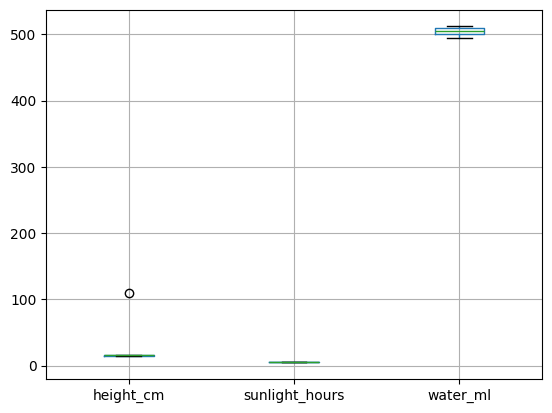

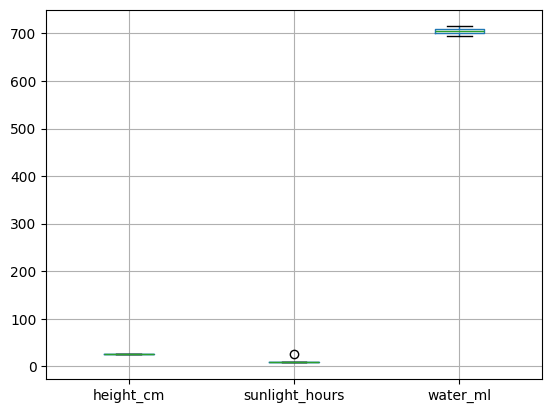

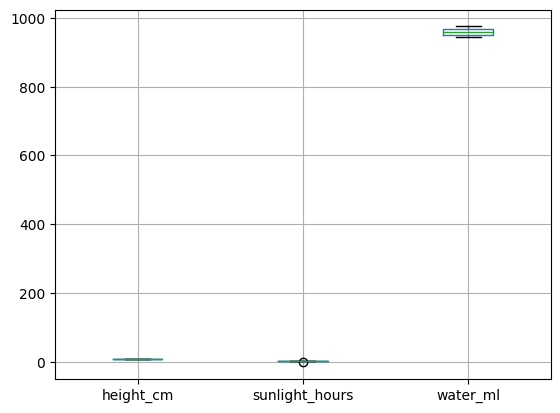

In [ ]:
# 2. 데이터 시각화를 통한 이상치 탐색:
from matplotlib import pyplot as plt

origin['species'].value_counts()

df1 = origin[origin['species'] == 'GlowLeaf']
df1.boxplot()
plt.show()

df1 = origin[origin['species'] == 'SunPetal']
df1.boxplot()
plt.show()

df1 = origin[origin['species'] == 'AquaRoot']
df1.boxplot()
plt.show()

#-----------------------------------------------------
# or: 한번에 반복문 돌림 ㄱㄱ (만약 종이 100개면 어쩌려고!)

#s = origin['species'].value_counts()
#for i in s.index: # 종 이름이 인덱스니까
#    df1 = origin[origin['species'] == i]
#    df1.boxplot()
#    plt.show()

In [ ]:
# 3. IQR을 이용한 이상치 식별 및 정제:
df2 = origin.drop(columns = 'species') # 계산 전에 이름열 빼주기
df2

# height_cm:
height_cm_q1 = df2['height_cm'].quantile(0.25)
height_cm_q3 = df2['height_cm'].quantile(0.75)
height_cm_iqr = height_cm_q3 - height_cm_q1

outline_max = height_cm_q3 + height_cm_iqr * 1.5
outline_min = height_cm_q1 - height_cm_iqr * 1.5

print("height_cm에 대한 iqr: %.2f, 하한 이상치 경계: %.2f, 상한 이상치 경계: %.2f"
      % (height_cm_iqr, outline_min, outline_max))

df2.loc[ (df2['height_cm'] < outline_min) | (df2['height_cm'] > outline_max)]

height_cm에 대한 iqr: 16.45, 하한 이상치 경계: -16.10, 상한 이상치 경계: 49.70


,height_cm,sunlight_hours,water_ml
plant_id,,,
4,110.0,5.0,502


In [ ]:
# ctrl+h : 동일 이름 여러개 전체 바꾸기!!
#-------------------------------------
# sunlight_hours:
sunlight_hours_q1 = df2['sunlight_hours'].quantile(0.25)
sunlight_hours_q3 = df2['sunlight_hours'].quantile(0.75)
sunlight_hours_iqr = sunlight_hours_q3 - sunlight_hours_q1

outline_max = sunlight_hours_q3 + sunlight_hours_iqr * 1.5
outline_min = sunlight_hours_q1 - sunlight_hours_iqr * 1.5

print("sunlight_hours에 대한 iqr: %.2f, 하한 이상치 경계: %.2f, 상한 이상치 경계: %.2f"
      % (sunlight_hours_iqr, outline_min, outline_max))

df2.loc[ (df2['sunlight_hours'] < outline_min) | (df2['sunlight_hours'] > outline_max)]

sunlight_hours에 대한 iqr: 5.65, 하한 이상치 경계: -6.10, 상한 이상치 경계: 16.50


,height_cm,sunlight_hours,water_ml
plant_id,,,
10,25.4,25.0,708


In [15]:
# 4. 검출되 이상치를 평균값으로 정제하고 결과 데이터셋 내기

import numpy as np
from pandas import DataFrame
from sklearn.impute import SimpleImputer

df3 = df2.copy()

outline_max = height_cm_q3 + height_cm_iqr * 1.5
outline_min = height_cm_q1 - height_cm_iqr * 1.5
df3.loc[ (df2['height_cm'] < outline_min) | (df2['height_cm'] > outline_max),
        'height_cm'] = np.nan

outline_max = sunlight_hours_q3 + sunlight_hours_iqr * 1.5
outline_min = sunlight_hours_q1 - sunlight_hours_iqr * 1.5
df3.loc[ (df2['sunlight_hours'] < outline_min) | (df2['sunlight_hours'] > outline_max),
        'sunlight_hours'] = np.nan

imr = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df_imr = imr.fit_transform(df3.values)
final_df = DataFrame(df_imr, index = df3.index, 
                     columns = df3.columns)
final_df

,height_cm,sunlight_hours,water_ml
plant_id,,,
1,15.200000,5.100000,505.0
2,14.800000,4.900000,498.0
3,15.500000,5.200000,510.0
4,16.678947,5.000000,502.0
5,15.100000,4.800000,495.0
6,25.300000,8.200000,705.0
7,24.900000,8.100000,698.0
8,25.500000,8.300000,710.0
9,25.100000,8.000000,702.0
